In [45]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../utilities')
import add_subdir_to_path


import numpy as np
import pandas as pd

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from collections import OrderedDict
from mysql_populate_table import  getNewsPubDateByPlayer, getplayerscore
from bokeh.models import Legend , HoverTool, Span
from datetime import datetime
import time

#get  data for the last 120 minutes from the database
hours_filter=24
player_id=""
#team="man utd manchester united"
team=""


data=getplayerscore(player_id,hours_filter)
news_date=getNewsPubDateByPlayer(player_id, team ,hours_filter )
news_date['pubdate_ft']=news_date.pubdate.dt.strftime('%Y%m%d')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
select hash_key, pubdate, title , feed_name
        from f_daily_news n
        where
        pubdate >= '2017-08-16 21:08:12'


,hash_key,pubdate,title,feed_name
0,4cdcc01c7415ac326401a26245966c64,2017-08-16 21:10:00,Real Madrid v Barcelona LIVE updates: Bale ben...,DAILY_EXPRESS
1,5c6449835e57a5f77d625fef251e38da,2017-08-16 21:16:00,Real Madrid v Barcelona LIVE updates: Bale ben...,DAILY_EXPRESS
2,0253ef5ea195308039b83e2e6c505175,2017-08-16 21:17:00,Transfer News LIVE updates: Coutinho to Barca;...,DAILY_EXPRESS
3,792200496cd7eb7d2d23c4475a3c5ee5,2017-08-16 21:24:00,Real Madrid v Barcelona LIVE updates: Bale ben...,DAILY_EXPRESS
4,cb28a7552d0e071525aef912dcdea302,2017-08-16 21:25:00,Real Madrid v Barcelona LIVE updates: Bale ben...,DAILY_EXPRESS


In [67]:
#data.tail()
distinct_player = getplayerscore(player_id,0.001)[:200]
#p=data.groupby("player_id")["date_id", "trend"].max().sort_values(by=['date_id', 'trend'] , ascending=False)

#distinct_player['news_cnt']= len(news_date[news_date['title'].str.contains('Romelu|Lukaku')].index)

 




In [89]:
#player_news=pd.DataFrame(columns=['hash_key', 'pubdate', 'title', 'feed_name', 'player', 'dt', 'news_cnt'])
player_news=pd.DataFrame(columns=[  'player', 'dt', 'news_cnt'])

for i, v in distinct_player.iterrows():
    search_str=v.player_name.replace(" ", "|")
    new_df=pd.DataFrame()
    new_df=news_date[news_date['title'].str.contains(search_str)]
    if  not new_df.empty:
        new_df["player"]=v.player_id
        new_df["dt"]= new_df.pubdate.dt.date
        new_df=new_df.sort_values(by='pubdate')
        new_df["news_cnt"]=new_df.groupby(['dt','player'])['pubdate'].rank(method='first').max()
        #new_df["news_cnt"]=new_df.groupby(['dt','player']).agg(['count'])
        player_news=pd.concat([player_news,new_df[['player', 'dt', 'news_cnt']].drop_duplicates(keep='first')])

#new_df.head()  
player_news.reset_index(inplace=True)
player_news.head()
        

/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,index,player,dt,news_cnt
0,766,romelu-lukaku,2017-08-17,2.0
1,831,harry-kane,2017-08-17,1.0
2,52,alexis-sanchez,2017-08-16,32.0
3,206,alexis-sanchez,2017-08-17,32.0
4,167,neymar,2017-08-16,18.0


In [119]:
x=pd.DataFrame.copy(data)
x['pct_change']= x['bprice'].pct_change(1)
x.head()
x.groupby(['date_id', 'player_id'])['pct_change'].max().head()
#pd.pivot_table(data[['date_id', 'player_id', 'bprice']], values='bprice', index=['date_id', 'player_id'],
#            columns=['bprice'], aggfunc=np.min)






date_id   player_id    
20170816  romelu-lukaku    0.000000
20170817  romelu-lukaku    0.001443
Name: pct_change, dtype: float64

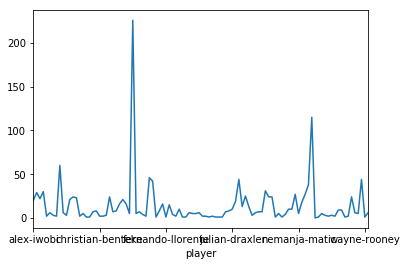

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
plt.figure(); ser.plot();

In [49]:

news_date.head()

,hash_key,pubdate,title,feed_name,pubdate_ft
0,4cdcc01c7415ac326401a26245966c64,2017-08-16 21:10:00,Real Madrid v Barcelona LIVE updates: Bale ben...,DAILY_EXPRESS,20170816
1,5c6449835e57a5f77d625fef251e38da,2017-08-16 21:16:00,Real Madrid v Barcelona LIVE updates: Bale ben...,DAILY_EXPRESS,20170816
2,0253ef5ea195308039b83e2e6c505175,2017-08-16 21:17:00,Transfer News LIVE updates: Coutinho to Barca;...,DAILY_EXPRESS,20170816
3,792200496cd7eb7d2d23c4475a3c5ee5,2017-08-16 21:24:00,Real Madrid v Barcelona LIVE updates: Bale ben...,DAILY_EXPRESS,20170816
4,cb28a7552d0e071525aef912dcdea302,2017-08-16 21:25:00,Real Madrid v Barcelona LIVE updates: Bale ben...,DAILY_EXPRESS,20170816


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.dates as dates



fig, ax1 = plt.subplots()

for index, dt in np.ndenumerate(romelu.dt.unique()):
    line=romelu[romelu.dt==dt]
    ax1.plot(line.pubdate, line.news_cnt, color='G')
    

#ax1.plot(line1.pubdate, line1.news_cnt, color='G')
#ax1.plot(line2.pubdate, line2.news_cnt, color='B')
ax1.set_xlabel('time (s)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('News cumsum', color='b')
ax1.tick_params('y', colors='b')



ax1.set_title('Cumulative count of news appearance over time')

ax2 = ax1.twinx()
ax2.plot(data.datetime_id, data.sprice, color='R')
ax2.set_ylabel('S Price', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()




In [36]:
import pandas as pd
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

df =pd.concat([df, df2])

df


In [41]:
df[['A','B']]

,A,B
0,1,2
1,3,4
0,5,6
1,7,8
